## El perceptrón 

Es una arquitectura de ANN, los inputs y outputs son valores numéricos, cada input está asociado con un peso. El *TLU* computa una función linear a los inputs además de un termino de sesgo y luego aplica una función **step**.

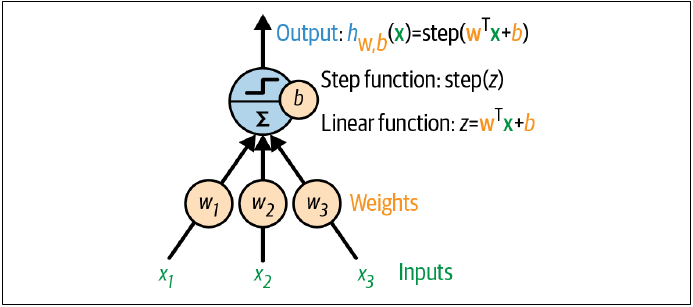

La función **step** mas común en los perceptrones es la función **Heaviside step**, a veces la función **signo** es usada en cambio.

\begin{equation}
heaviside(z) = \begin{cases} 
0 \hspace{0.2cm} \text{if} \hspace{0.2cm} z < 0 \\
1 \hspace{0.2cm} \text{is} \hspace{0.2cm} z \geq 0
\end{cases}
\end{equation}

Un perceptrón se compone de uno o más TLU organizados en una capa, cada **TLU** está conectado a todos los inputs. Esta capa se llama **capa totalmente conectada** o **capa densa**, por ejemplo,

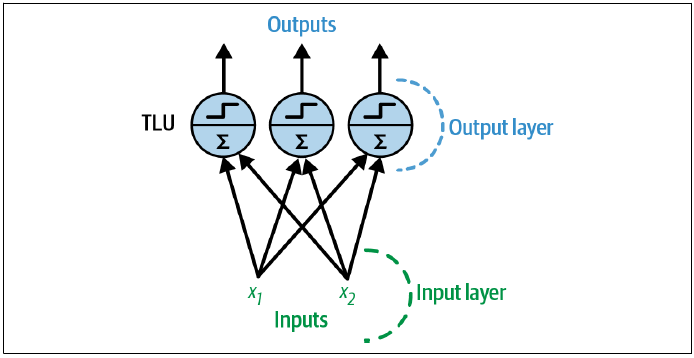

Este perceptrón puede clasificar en tres categorias binarias diferentes, por lo tanto se puede usar en clasificación multiclase.

Los outputs para varias observaciones se computan con la siguiente ecuación:

\begin{equation}
h_{w, b}(X) = \phi(XW + b)
\end{equation}

- X representa la matriz de variables inputs, una fila por observación y una columna por variable.
- La matriz de pesos W contiene los pesos de las conexiones. Tiene una fila por input y una columna por neurona.
- El vector b contiene el termino del sesgo: uno por neurona.
- La función $\phi$ es llamada la **función de activación**.

Para entrenar un perceptrón se usa **la regla de Hebbs**, cuando una neurona activa otra neurona muy seguido la conexión entre esas dos neuronas crece más fuerte. Un perceptrón se entrena usando una variante de esta regla que tiene en cuenta el error hecho por la red cuando hace una predicción. El perceptrón recibe una observación al tiempo, por cada observación hace su predicción. Para cada neurona output que produce una predicción erronea refuerza los pesos de conexión de los inputs que habrían contribuido a la predicción correcta, esta es la ecuación de **la regla de aprendizaje del perceptrón**:

\begin{equation}
w_{i, j}^{\text{siguiente paso}} = w_{i, j} + \eta(y_j - \hat{y}_j)x_i
\end{equation}

En esta ecuación:

- $w_{i, j}$ es el peso de conexión entre el i-esimo input y la j-esima neurona.
- $x_i$ es el valor del i-esimo input de la observación de entrenamiento actual.
- $\hat{y}_j$ es el output de la j-esima neurona para la obvservación de entrenamiento actual.
- $y_j$ es el output objetivo de la j-esima neurona para la observación de entrenamiento actual.
- $\eta$ es la tasa de aprendizaje.

El limite de decisión de cada neurona de saldia es lineal, perceptrones son incapaces de aprender patrones complejos, si las observaciones de entrenamiento son linealmente separables, el algoritmo converge a una solución (no es única, cuando son linealmente separables hay infinitos hiperplanos que pueden separarlos), esto se llama **Teorema de convergencia de perceptrón**.

Scikit tiene la clase de `perceptron`

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(random_state = 42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)
y_pred

array([ True, False])

Usar la clase `Perceptron` es equivalente a usar `SGDClassifier` con los hiperparámetros `loss = "Perceptron"`, `learning_rate = "constant"`, `eta0 = 1` (tasa de aprendizaje), `penalty = None` (sin regularización).

Las limitaciones del perceptrón se puede eliminar apilando varios perceptrones. El resultado es una ANN llamada **multilayer perceptron** (MLP), por ejemplo en el problema de clasificación XOR

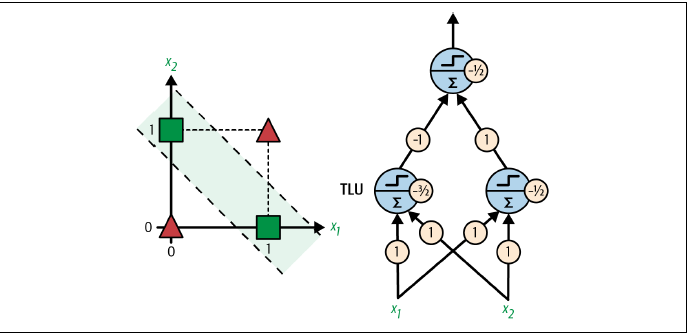

Los perceptrones no devuelven las probabilidades de las clases, no usan regularización por defecot y el entrenamiento para en cuanto no haya más errores de predicción lo que hace que el modelo no generalice tan bien.

## El perceptrón multicapa y backpropagation

un MLP se compone por una capa de entrada, una o más capas de TLU llamadas capas oculta y una capa final de TLU llamadas la capa de salida.

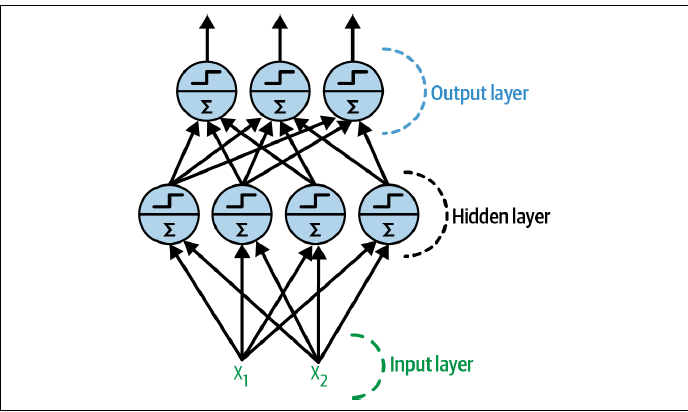

Aqui las señales solo van en una dirección (de entradas a salidas), esta arquitectura se llama **feedforward neural network** (FNN).

Cuando una ANN contiene dos o más capas ocultas se llama **deep neural network**. El campo de estudio de las DNN se llama deep learning.

En 1970 Seppo Linnainmaa introdujo una forma de calcular los gradientes automaticamente y eficientemente. Este algoritmo se llamó **reverse-mode automatic differentiation**. Solo con dos pases a traves de la red (una al frente y otro atrás) computa los gradientes del error de la red neuronalcon relación a cada uno de los parámetros del modelo. Encuentra como se deben ajustar los pesos y los sesgos para reducir el error de la red neuronal, estos gradientes se pueden usar para hacer descenso de gradiente. Esta combinación de reverse-mode autodiff y descenso de gradiente se llama **backpropagation**.

El backpropagation sirve así:

- Maneja un mini-lote al tiempo y pasa por el conjunto completo multiples veces, cada vez es llamada **epoch** (epoca).
- Cada mini-lote entra a la red a través de la capa de entrada. El algoritmo computa la salida de todas las neuronas en la primer capa oculta, para cada observación del mini-lote. El resultado se pasa a la siguiente capa, su salida se computa y se pasa a la siguiente capa y así hasta llegar a la capa de salida. Este es el paso hacia adelante.
- Ahora, el algoritmo mide el error de salida del la red.
- Computa qué tanto cada sesgo de salida y cada conexión a la capa de salida contribuye al error. Esto se hace aplicando la **regla de la cadena**.
- El algoritmo mide que tanto de estas contribuciones al error viene de cada conexión en la capa previa, usando la regla de la cadena, yendo hacia atrás hasta alcanzar la capa de entrada.
- Por ultimo, el algoritmo hace un descenso de gradiente para ajustar todos los pesos de conexiones en la red, usando los gradientes del error que acaba de computar.

Es importante inicializar las capas ocultas al azar o el entrenamiento fallará.

En resúmen: backpropagation hace predicciones para un mini lote (paso hacia delante), mide el error, luego va a través de cada capa en reversa para medir la contribución al error de cada parámetro (paso hacia atras), luego ajusta los pesos de conexión y los sesgos para reducir el error (descenso de gradiente).

Para que el backpropagation funcione, Rumelhart et al hicieron cambios a la arquitectura del MLP, reemplazaron la función step con la función logistica $\sigma(z) = 1 / (1 + exp(-z))$ también llamada la **funcion sigmoide**, esta función tiene bien definido una derivada distinta a cero en todas partes, permitiendo que el gradiente haga progreso en cada paso, algunas otras funciones populares son:

- **función hiperbólica tangente**: $tanh(z) = 2\sigma(2z) - 1$, esta función igual que la anterior tiene forma de S, continua y diferenciable, pero su salida es entre -1 a 1 (la función sigmoide es entre 0 y 1). Este rango ayuda a que las salidas de cada capa sean más o menos centradas al rededor de 0 al inicion del entrenamiento lo cual ayuda a la convergencia.

- **Rectified linear unit function** (ReLU): $ReLU(z) = max(0, z)$, esta función es continua pero no es diferenciable en $z = 0$, (la pendiente cambia de forma abrupta en 0, lo que puede hacer que el descenso de gradiente rebote), y su derivada es 0 para $z < 0$, en la practica funciona bien y es rápida por lo que se convirtió en la función por defecto. 

## Regresión con MLP

Si se quiere predecir un solo valor, se necesita una sola neurona de salida, para regresión multivariada se necesita una neurona de salida por dimensión de salida. 

Scikit tiene la clase `MLPRegressor`, vamos a usarlo con 3 capas ocultas de 50 neuronas cada una y entrenarlo en el conjunto de datos de las casas de california. Dado que las redes funcionan con descenso de gradiente hay que estandarizar la variables, en este modelo se usará la función de activación ReLU y usa una variante del descenso de gradiente llamada **Adam** para minimizar el error cuadrado medio con un poco de regularización $l2$ (se puede controlar con el hiperparámetro `alpha`)


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Crear datos de entrenamiento, prueba y validación

housing = fetch_california_housing() 
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state = 42)

# modelo

mlp_reg = MLPRegressor(hidden_layer_sizes = [50, 50, 50], random_state = 42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared = False)
rmse

0.5053326657968725

Este MLP no usa ninguna función de activación en la neurona de salida, por lo tanto la salida puede ser cualquier valor, si se quiere que la salida sea siempre positiva se debería usar la activación ReLU o la función **softplus** $softplus(z) = log(1 + exp(z))$, si se quiere la salida entre un rango se debería usar la función **sigmoide** o la **tangente hiperbólica** y escalar las variables objetivo a la escala apropiada. `MLPRegressor` no soporta una función de activación en la capa de salida.

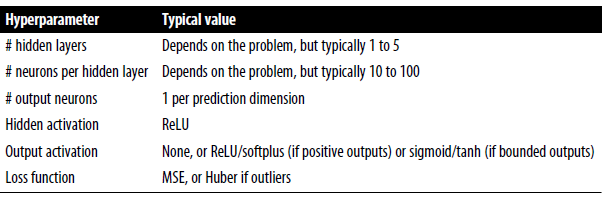

## MLP para clasificación

Para una clasificación binaria solo se necesita una neurona usando la función de activación **sigmoide**, el resultado es un número entre 0 y 1 el cual es interpreta como la probabilidad estimada de la clase positiva.

También se pueden tener problemas de clasificación binaria multietiqueta, por ejemplo, se necesitarían dos neuronas de salida ambdas usando la función **sigmoide**, una se encarga de estimar la probabilidad de una etiqueta y la siguiente neurona la probabilidad de la segunda etiqueta.

Si cada observación puede pertenecer a una sola clase, se necesita tener una neurona de salida por clase y la función de activación **sigmoide** para la capa completa.

La función de perdida puede ser la **cross entropy loss**.

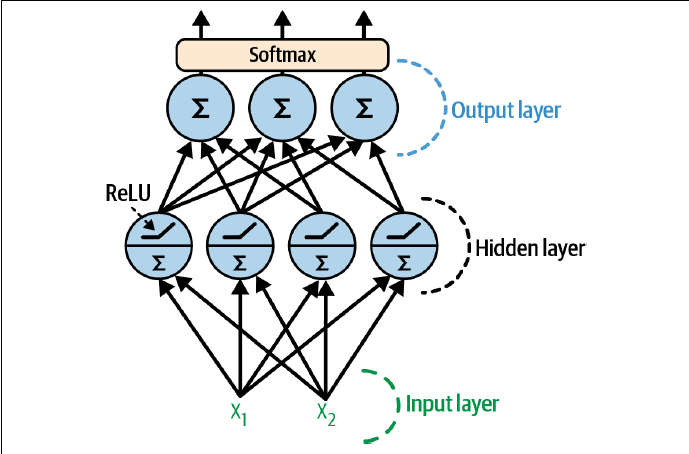

In [3]:
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

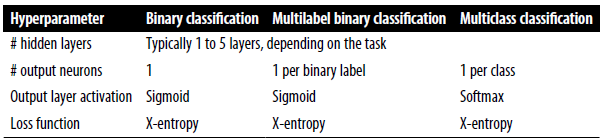

# Implementando MLP con Keras
## Creando un clasificador de imagenes usando API secuencial

In [4]:
import tensorflow as tf

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [6]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

Las intensidades de los pixeles están representadas en enterod (de 0 a 255) en vez de floats (0.0 a 255.0), por simplicidad se escalan los pixeles a 0 - 1 dividiendolos entre 255 (también se transforman a floats)

In [9]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

Ahora necesitamos la lista de clases que se representan en el conjunto de datos.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Ankle boot'

In [13]:
import matplotlib.pyplot as plt

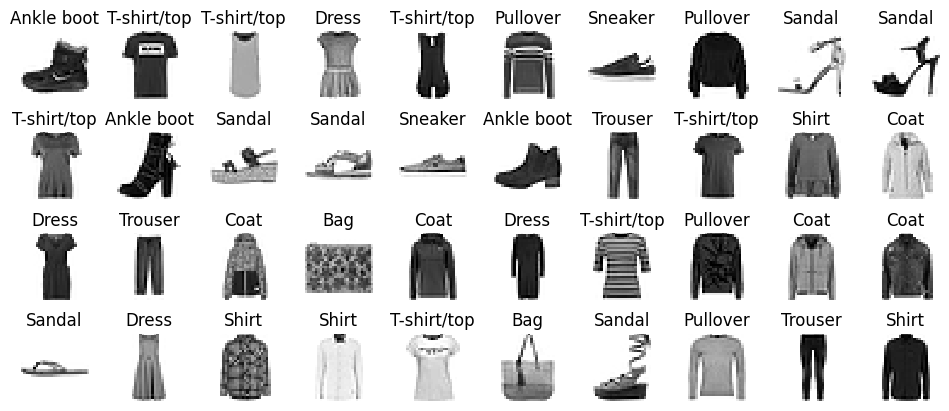

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))

for row in range (n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace = 0.5)

In [13]:
## Crear el modelo usando una API secuencial
# MLP clasificación con dos capas ocultas

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

- Primero se establece una semilla para tener resultados reproducibles, los pesos aleatorios de las capas ocultas y la salida de las capas van a ser siempre las mismas, también se puede utilizar `tf.keras.utils.set_random_seed()`, esta establece la semilla para tensorflow, python y Numpy.

- Creamos un modelo **secuencial**, este es el modelo más sencillo de Keras para redes que se componen de una pila de capas conectadas secuencialmente, se le llama **API secuencial**.

- Creamos una primera capa (de entrada) y la añadimos al modelo, especificamos la forma de la entrada, la forma de las observaciones. Keras necesita esto para determinar la forma de la matriz de pesos de conexión de la primer capa oculta.

- Agregamos una capa **Flatten**, lo que hace es convertir cada imagen de entrada a un array de una dimensión, por ejemplo, si recibe un lote de forma [32, 28, 28] lo transforma en [32, 784].

- Añadimos una capa oculta con 300 neuronas. Usa la activación ReLU. Cada capa densa tiene su propia matriz de pesos que contiene todas las conexiones entre neuronas y entradas. También tiene un vector de sesgos (uno por neurona).

- Añadimos una segunda capa densa oculta con 100 neuronas también usando ReLU.

- Añadimos la capa de salida con 10 neuronas (una por clase), usando la clase softmax ya que las clases son exclusivas.

En vez de añadir capa por capa podemos pasar la lista de capas al crear el modelo secuencial.

In [14]:
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, activation="relu"),
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])

El método **summary** muestra todas las capas del modelo incluyendo los nombres de cada capa, la forma de la salida (None significa que el lote puede ser cualquier forma) y su numero de parámetros, entrenables y no entrenables

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Las capas ocultas tienen muchos parámetros, por ejemplo la primera tiene una matriz de pesos de conexión de 784 x 300  más 300 términos de sesgo, lo cual suma 235500 parámetros, esto tiende a sobreajustar los modelos, sobretodo cuando no se tienen muchos datos de entrenamiento.

Keras escoge los nombres de las capas automaticamente haciendolas únicas globalmente (por si queremos unir modelos), se pueden obtener así:

In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

Todos los parámetros de una capa se pueden acceder usando `get_weights()` y `set_weights()`, incluye los pesos de conexión y los terminos del sesgo

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00867289, -0.02596976,  0.01533711, ...,  0.00451264,
        -0.00323428, -0.0590295 ],
       [ 0.04637853,  0.00850832, -0.03983871, ...,  0.02068929,
         0.03289476, -0.03263105],
       [ 0.0619577 ,  0.07328448,  0.05709261, ..., -0.02356314,
        -0.0636417 , -0.00024971],
       ...,
       [ 0.03781221,  0.07095759, -0.02232334, ..., -0.01934542,
         0.0398003 ,  0.04488333],
       [-0.05076384,  0.0634675 , -0.02810682, ...,  0.04792905,
         0.05770431, -0.0232486 ],
       [-0.05198883, -0.03358661, -0.04764944, ..., -0.04692906,
        -0.06678685,  0.04640026]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

Los pesos de conexión se iniciaron al azar (para romper la simetría) y los sesgos se iniciaron todos en cero, lo cual está bien. Si se quiere usar otro método de inicialización se puede cambia `kernel_initializer` (kernel es otro nombre para la matriz de conexiones) o `bias_initializer` al crear la capa, se discutirán después.

## Compilando el modelo

Luego de crear el modelo se debe llamar el método `compile()` para especificar la función de perdida y el optimizador que se va a usar, también se pueden especificar varias métricas para computar durante el entrenamiento y la evaluación

In [22]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

Usamos `sparse_categorical_crossentropy` ya que tenemos categoricas sparse y las clases son exclusivas (0, 1, 2, 3, ... , 9), si tuvieramos una probabilidad objetivos por clase (0, 0, 0, 1, 0, ..., 0) usariamos la perdida `categorical_crossentropy`, si tuvieramos clasificación binaria o clasificación binaria multiple usariamos `binary_crossentropy`.

`sgd` hace referencia a que vamos a usar stochastic gradient descent, Keras hará **backpropagation**, casi siempre se desea optimizar la tasa de aprendizaje, `optimizer=tf.keras.optimizers.SGD(learning_rate=__???__)`.

## Entrenamiento y evaluación

Para esto llamamos el método `fit()`

In [23]:
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7090 - accuracy: 0.7687 - val_loss: 0.5063 - val_accuracy: 0.8256
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4876 - accuracy: 0.8312 - val_loss: 0.4657 - val_accuracy: 0.8334
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4404 - accuracy: 0.8467 - val_loss: 0.4261 - val_accuracy: 0.8496
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4138 - accuracy: 0.8563 - val_loss: 0.3986 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3917 - accuracy: 0.8626 - val_loss: 0.3912 - val_accuracy: 0.8606
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3747 - accuracy: 0.8681 - val_loss: 0.3901 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3615 - accuracy: 0.8714 - val_loss: 0.3757 - val_accuracy:

Keras evalúa la pérdida y cada métrica al final de cada época, si el rendimiento es mayor el el entrenamiento que en la validación, el modelo está sobreajustando. 

Podemos gráficar las curvas de aprendizaje:

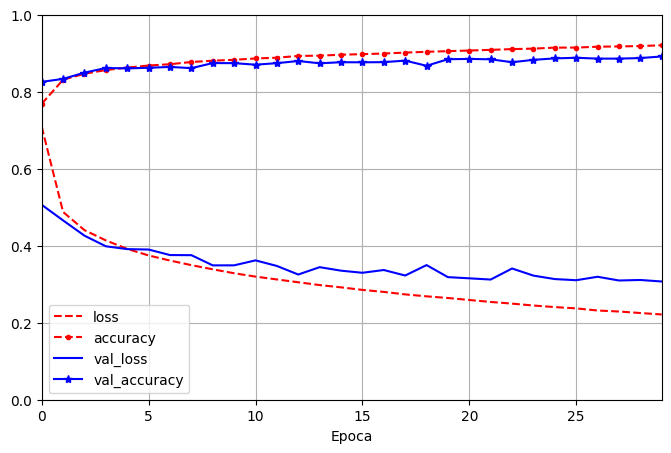

In [24]:
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize = (8, 5), xlim = [0, 29], ylim = [0, 1], grid = True, xlabel = 'Epoca',
    style = ['r--', 'r--.', 'b-', 'b-*'])
plt.show()

La accuracy tanto en entrenamiento como en validación aumentan, lo cual es bueno, van juntas pero empiezan a alejarse, eso se puede deber a un problema pequeño de sobreajuste.

Se puede observar que el modelo no ha convergido, ya que la perdida de validación sigue disminuyendo así que se debería seguir entrenando, esto se puede hacer llamando el método `fit()` otra vez, Keras seguirá el entrenamiento donde ib.

Si no se está feliz con el rendimiento hay que ajustar los hiperparámetros. El primero a revisar es **la tasa de aprendizaje**, si no funciona se debería intentar otro **optimizador**. Si nada de eso funciona se debe intentar ajustar el numero de capas, las neuronas por capa y los tipos de activación en cada capa oculta.

Una vez se esté contento con el rendimiento, debemos evaluar el modelo en el conjunto de prueba para estimar el error de generalización, se hace con el método `evaluate()`

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 924us/step - loss: 0.3253 - accuracy: 0.8869


[0.32529252767562866, 0.886900007724762]

No se deben ajustar los hiperparámetros con el conjunto de prueba!!!

## Usando el modelo para hacer predicciones

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

El modelo estima las probabilidades de pertenecer a cada clase para cada observación.

In [27]:
import numpy as np
y_pred = y_proba.argmax(axis = -1)
y_pred

array([9, 2, 1], dtype=int64)

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

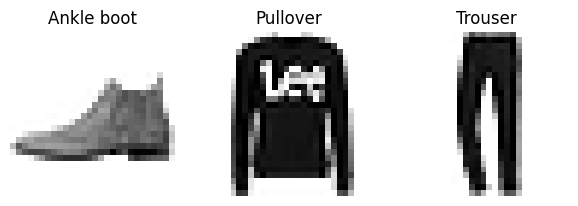

In [29]:
plt.figure(figsize = (7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap = 'binary', interpolation = 'nearest')
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

## Regresión usando MLP

Es bastante similar, una diferencia es que la capa de salida solo tiene una neurona y no usa función de activación, la función de perdida es el **error cuadrado medio**, la metrica es **RMSE** y usamos el optimizador **Adam**.

Aquí en vez de tener una capa **Flatten** usamos una capa **Normalization**, para escalar los datos, debe ser ajustada a los datos de entrenamiento usando el método `adapt()` antes de que se use `fit()`

In [30]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [31]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = 'mse', optimizer = optimizer, metrics = ["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 20,
                   validation_data = (X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
print(mse_test, rmse_test)

X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8823 - root_mean_squared_error: 0.9393 - val_loss: 0.6830 - val_root_mean_squared_error: 0.8264
Epoch 2/20
363/363 [==============================] - 0s 858us/step - loss: 0.3791 - root_mean_squared_error: 0.6157 - val_loss: 2.9166 - val_root_mean_squared_error: 1.7078
Epoch 3/20
363/363 [==============================] - 0s 881us/step - loss: 0.3780 - root_mean_squared_error: 0.6148 - val_loss: 0.3179 - val_root_mean_squared_error: 0.5639
Epoch 4/20
363/363 [==============================] - 0s 990us/step - loss: 0.3385 - root_mean_squared_error: 0.5818 - val_loss: 1.6542 - val_root_mean_squared_error: 1.2862
Epoch 5/20
363/363 [==============================] - 0s 885us/step - loss: 0.3321 - root_mean_squared_error: 0.5763 - val_loss: 4.2190 - val_root_mean_squared_error: 2.0540
Epoch 6/20
363/363 [==============================] - 0s 895us/step - loss: 0.3426 - root_mean_squared_error: 0.5853 - val_loss: 0.3

## Construyendo modelos complejos usando la API functional

Cuando se quieren construir redes más complejas con multiples inputs y outputs es mejor usar esta API, una ejemplo es la red neuronal no secuencial **Wide and Deep**. Conecta todos o parte de los inputs directamente a la capa de salida haciendo posible que la red aprenda patrones profundos (usando el camino profundo) y reglas simples (usando el camino corto). 

Un MLP regular fuerza a que todos los datos recorran todas las capas, esto puede hacer que patrones simples terminen distorsionados por la secuencia de transformaciones.

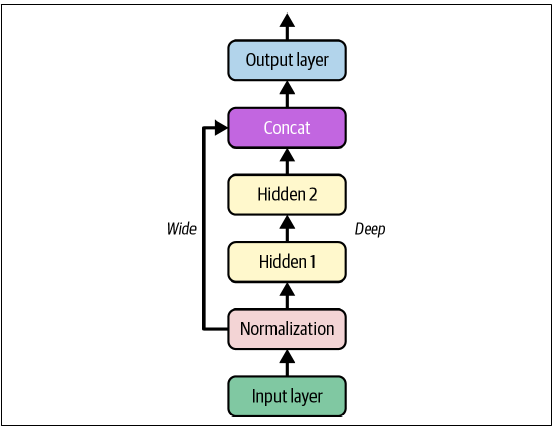

Vamos a construir una red neuronal de este tipo para el problema de las casas de California.

In [32]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation = 'relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs = [input_], outputs = [output])

- Primero creamos 5 capas: una capa de normalización para estandarizar los inputs, dos capas densas con 30 neuronas cada una, usando la activación ReLU, una capa de concatenación y otra capa densa con una sola neurona para la capa salida, sin función de activación.

- Creamos un objeto de entrada, esta es una especificación del tipo de entrada que va a recibir el modelo incluyendo su forma y el tipo opcionalmente.

- Luego usamos la capa de normalización como una función pasando la entrada como objeto, todo esto es solo para decirle a keras como conectar las capas juntas, no se pasa ningún dato.

- Luego pasamos normalized a la capa oculta 1 y obtenemos hidden1, luego pasamos hidden1 por la capa oculta 2, obtenemos hidden2.

- Hemos conectado las capas secuencialmente, ahora concatenamos la entrada y hidden2, luego pasamos la concatenación a la capa de salida lo cual nos da la salida final.

- Finalmente creamos un modelo de Keras, especificando las entradas y las salidas.

Luego se hace el mismo procedimiento, compilar el modelo, adaptar la capa de normalización, ajustar el modelo, evaluarlo y usarlo para hacer predicciones.

Pero si quisieramos mandar un subconjunto de las variables por el camino corto y otro subconjunto (pueden tener algunos mismo datos) por el camino profundo? Una solución es usar varias entradas. Por ejemplo, si quisieramos mandar cinco variables por el camino corto y seis por el camino profundo, podemos hacerlo así:

In [33]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs = [input_wide, input_deep], outputs = [output])

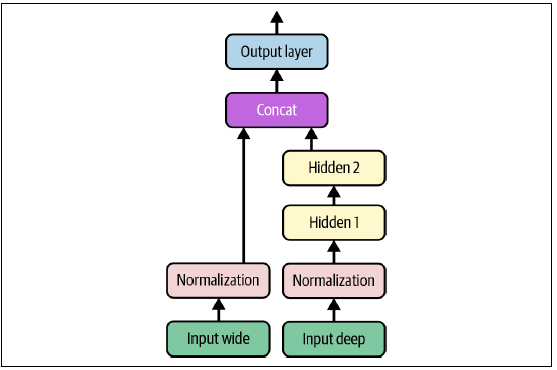

Aquí cada capa densa se crea y se llama en la misma linea, así el codigo se ve mejor, esto no se puede hacer con la capa de normalización ya que necesitamos una referencia a la capa para poder llamar el método `adapt()` antes de ajustar el modelo.

Ahora compilamos el modelo y cuando llamemos el método `fit()` tenemos que pasar un par de matrices, una por cada entrada, lo mismo para el conjunto de validación y prueba.

In [34]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = "mse", optimizer = optimizer, metrics = ['RootMeanSquaredError'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [35]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs = 20,
                   validation_data = ((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))
mse_test

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.3374 - root_mean_squared_error: 1.1564 - val_loss: 0.9228 - val_root_mean_squared_error: 0.9606
Epoch 2/20
363/363 [==============================] - 0s 871us/step - loss: 0.5118 - root_mean_squared_error: 0.7154 - val_loss: 0.9065 - val_root_mean_squared_error: 0.9521
Epoch 3/20
363/363 [==============================] - 0s 875us/step - loss: 0.4481 - root_mean_squared_error: 0.6694 - val_loss: 0.4475 - val_root_mean_squared_error: 0.6690
Epoch 4/20
363/363 [==============================] - 0s 881us/step - loss: 0.4203 - root_mean_squared_error: 0.6483 - val_loss: 0.4378 - val_root_mean_squared_error: 0.6617
Epoch 5/20
363/363 [==============================] - 0s 878us/step - loss: 0.3996 - root_mean_squared_error: 0.6322 - val_loss: 0.5392 - val_root_mean_squared_error: 0.7343
Epoch 6/20
363/363 [==============================] - 0s 882us/step - loss: 0.3859 - root_mean_squared_error: 0.6212 - val_loss: 0.4

[0.32594040036201477, 0.5709118843078613]

Ahora, cuando queremos multiples salidas:

- Por ejemplo, se quiere localizar y clasificar el objeto en un imagen, es una regresión y una clasificación.

- Se pueden tener varias tareas independientes basadas en los mismos datos, en vez de entrenar una red neuronal para cada tarea, se puede entrenar una red neuronal con una salida por tarea y tendrías mejor resultados.

- Otro ejemplo es una tecnica de regularización. Por ejemplo se desea añadir una salida opcional en una arquitectura de red neuronal para que la red aprenda algo util por si sola, sin depender del resto de la red.

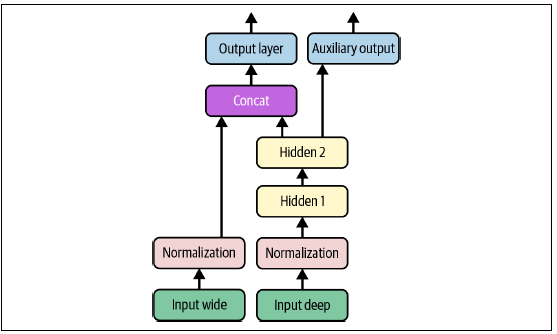

In [36]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
# salida auxiliar
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs = [input_wide, input_deep],
                      outputs = [output, aux_output])

Cada salida necesita su propia función de perdida, por lo tanto cuando compilemos el modelo deberiamos pasar una lista de perdidas, si pasamos solo una, keras asume que se va a usar esa para todos las salidas, keras sumará las perdidas y ya. Ya que tenemos una salida auxiliar, le queremos dar menor peso a esta, esto se puede cambiar al compilar el modelo.

In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = ('mse', 'mse'), loss_weights = (0.9, 0.1), optimizer = optimizer,
             metrics = ['RootMeanSquaredError'])

Ahora cuando corramos el modelo necesitamos darle etiquetas a cada salida, en este caso podemos solo poner (y_train, y_train) ya que tenemos dos salidas

In [38]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs = 20,
    validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5981 - dense_18_loss: 1.4187 - dense_19_loss: 3.2130 - dense_18_root_mean_squared_error: 1.1911 - dense_19_root_mean_squared_error: 1.7925 - val_loss: 1.8500 - val_dense_18_loss: 1.1873 - val_dense_19_loss: 7.8142 - val_dense_18_root_mean_squared_error: 1.0896 - val_dense_19_root_mean_squared_error: 2.7954
Epoch 2/20
363/363 [==============================] - 0s 995us/step - loss: 0.5530 - dense_18_loss: 0.5080 - dense_19_loss: 0.9580 - dense_18_root_mean_squared_error: 0.7127 - dense_19_root_mean_squared_error: 0.9788 - val_loss: 0.9048 - val_dense_18_loss: 0.7576 - val_dense_19_loss: 2.2291 - val_dense_18_root_mean_squared_error: 0.8704 - val_dense_19_root_mean_squared_error: 1.4930
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4674 - dense_18_loss: 0.4443 - dense_19_loss: 0.6750 - dense_18_root_mean_squared_error: 0.6666 - dense_19_root_mean_squared_error: 0.8216 - val_loss: 0.4

Cuando evaluamos el modelo, keras devuelve la suma ponderada de las perdidas y también las perdidas individuales y las métricas

In [39]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 692us/step - loss: 0.3434 - dense_18_loss: 0.3379 - dense_19_loss: 0.3928 - dense_18_root_mean_squared_error: 0.5813 - dense_19_root_mean_squared_error: 0.6268


In [40]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test), return_dict = True)
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 0s 709us/step - loss: 0.3434 - dense_18_loss: 0.3379 - dense_19_loss: 0.3928 - dense_18_root_mean_squared_error: 0.5813 - dense_19_root_mean_squared_error: 0.6268


También tenemos el método `predict()`

In [41]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 48ms/step


In [42]:
# para obtener un diccionario de las predicciones

y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 [==============================] - 0s 14ms/step


{'dense_18': array([[0.39466503],
        [1.0469623 ],
        [3.5099852 ]], dtype=float32),
 'dense_19': array([[0.561632 ],
        [0.8193557],
        [3.203125 ]], dtype=float32)}

## Usando el API de subclase para construir modelos dinámicos

el API funcional y secuencial son declarativos, se declara las capas y como se conectan, solo despues de esto se pueden dar datos al modelo. Las ventajas de esto es que el modelo puede guardarse fácil, clonarse y compartirse, su estructura se puede mostrar y analizar, la estructura puede inferir formas y revisar tipos, lo que hace que encontrar errores sea más fácil. También es fácil de hacer **debug**, pero el principal problema es que es estático. Algunos modelos necesitan loops, formas cambiantes, conditional branching, y otros comportamiento dinámicos, para estos casos es mejor un estilo de programación imperativo, usamos el API de subclases?

Para esto, se hace subclass de la clase **Model**, crear las capas que se necesiten en el constructor y usarlas para realizar computaciones en el método 

In [43]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
        
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42) 
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

De esta forma no hay necesidad de crear el modelo, solo tenemos que llamar el método `call()`. Ahora podemos compilarlo, adaptar las capas de normalización, ajustarlo, evaluarlo y hacer predicciones.

La diferencia con este API es que se pueden incluir casi todo en el método `call()`: for loops, if statements, operaciones de tensorflow. Esta flexibilidad viene con un costo, la arquitectura del modelo está escondida en el método `call()`, keras no puede inspeccionarla, no puede ser clonado usando `tf.keras.models.clone_model()` y cuando se llama el método `summary()` solo se devuelve una lista de capas, keras no puede revisar los tipos y las formas de los inputs, lo mejor es quedarse con el API secuencial o funcional.

## Guardando y restaurando un modelo 

guardar un modelo es tan simple como:

In [44]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8705 - output_1_loss: 1.8099 - output_2_loss: 2.4157 - output_1_root_mean_squared_error: 1.3453 - output_2_root_mean_squared_error: 1.5542 - val_loss: 1.3007 - val_output_1_loss: 0.5879 - val_output_2_loss: 7.7158 - val_output_1_root_mean_squared_error: 0.7667 - val_output_2_root_mean_squared_error: 2.7777
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5426 - output_1_loss: 0.5230 - output_2_loss: 0.7191 - output_1_root_mean_squared_error: 0.7232 - output_2_root_mean_squared_error: 0.8480 - val_loss: 1.2011 - val_output_1_loss: 0.9224 - val_output_2_loss: 3.7092 - val_output_1_root_mean_squared_error: 0.9604 - val_output_2_root_mean_squared_error: 1.9259
Epoch 3/10
363/363 [==============================] - 0s 997us/step - loss: 0.4788 - output_1_loss: 0.4640 - output_2_loss: 0.6120 - output_1_root_mean_squared_error: 0.6812 - output_2_root_mean_squared_error: 0.7823 - val_loss: 0.6

In [45]:
import shutil

shutil.rmtree("keras_model", ignore_errors=True)

In [46]:
model.save('keras_model', save_format = 'tf')

INFO:tensorflow:Assets written to: keras_model\assets


INFO:tensorflow:Assets written to: keras_model\assets


In [47]:
from pathlib import Path

for path in sorted(Path("keras_model").glob("**/*")):
    print(path)

keras_model\assets
keras_model\fingerprint.pb
keras_model\keras_metadata.pb
keras_model\saved_model.pb
keras_model\variables
keras_model\variables\variables.data-00000-of-00001
keras_model\variables\variables.index


Cuando se guarda un modelo, el archivo `saved_model.pb` contiene la arquitectura y la lógica, esto es suficiente para aplicarlo en producción, el archivo `keras_metadata.pb` contiene la información extra requerida por keras. el subdirectorio `variables` contiene los valores de los parámetros (conexiones, sesgos, normalización, parámetros de optimización), el directorio `assets` contiene archivos extras (muestras, nombres de variables, nombres de clases).

Tipicamente se tiene un script que entrena el modelo y lo guarda, y otros scripts que cargan el modelo y lo usan para evaluar o hacer predicciones.

In [48]:
model = tf.keras.models.load_model("keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 59ms/step


También se pueden guardar los pesos `save_weights()`, `load_weights()` para guardar y cargar los valores de los parámetros

## Usando callbacks

Usando callbacks podemos guardar checkpoints en el entrenamiento de nuestro modelo por si algo llega a suceder.

El método `fit()` acepta callbacks que dejan especificar una lista de objetos que keras va a llamar antes y después del entrenamiento, antes y después de cada epoca, antes y después de cada lote. Por ejemplo, el callback `ModelCheckpoint` crea una guardado en intervalos regulares durante el entrenaimiento, por defecto al final de cada epoca

In [49]:
shutil.rmtree("my_checkpoints", ignore_errors=True)

In [50]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3523 - output_1_loss: 0.3451 - output_2_loss: 0.4173 - output_1_root_mean_squared_error: 0.5875 - output_2_root_mean_squared_error: 0.6460 - val_loss: 0.9303 - val_output_1_loss: 0.9531 - val_output_2_loss: 0.7249 - val_output_1_root_mean_squared_error: 0.9763 - val_output_2_root_mean_squared_error: 0.8514
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3533 - output_1_loss: 0.3466 - output_2_loss: 0.4138 - output_1_root_mean_squared_error: 0.5887 - output_2_root_mean_squared_error: 0.6433 - val_loss: 0.9394 - val_output_1_loss: 0.9492 - val_output_2_loss: 0.8513 - val_output_1_root_mean_squared_error: 0.9743 - val_output_2_root_mean_squared_error: 0.9227
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3479 - output_1_loss: 0.3412 - output_2_loss: 0.4075 - output_1_root_mean_squared_error: 0.5842 - output_2_root_mean_squared_error: 0.6384 - val_loss: 0.405

Si se usa el conjunto de validación durante el entrenamiento podemos poner `save_best_only = True` al crear el checkpoint para solo guardar el modelo cuando el rendimiento en el conjunto de validación sea el mejor. Este es un método de parada temprana pero que no para el entrenamiento.

Otra forma es usar `EarlyStopping`, esta dentendrá el entrenamiento si no nota mejoría en el conjunto de validación durante un número de épocas (definidas por `patience`), si se pone `restore_best_weights = True` se devuelve al mejor modelo al final del entrenamiento. 

Se pueden combinar los callbacks, más opciones de callbacks están disponibles en `tf.keras.callbacks`.

Si se necesita más control se pueden crear callbacks propios, por ejemplo el siguiente callback muestra la radio entre la perdida de validación y la perdida de entrenamiento

In [51]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3290 - output_1_loss: 0.3229 - output_2_loss: 0.3837 - output_1_root_mean_squared_error: 0.5682 - output_2_root_mean_squared_error: 0.6195 - val_loss: 0.5735 - val_output_1_loss: 0.5659 - val_output_2_loss: 0.6421 - val_output_1_root_mean_squared_error: 0.7523 - val_output_2_root_mean_squared_error: 0.8013
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3301 - output_1_loss: 0.3244 - output_2_loss: 0.3810 - output_1_root_mean_squared_error: 0.5696 - output_2_root_mean_squared_error: 0.6173 - val_loss: 0.5268 - val_output_1_loss: 0.5060 - val_output_2_loss: 0.7146 - val_output_1_root_mean_squared_error: 0.7113 - val_output_2_root_mean_squared_error: 0.8453
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3238 - output_1_loss: 0.3181 - output_2_loss: 0.3758 - output_1_root_mean_squared_error: 0.5640 - output_2_root_mean_squared_error: 0.6131 - val_loss: 0.

In [52]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [53]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=0.98
Epoch=1, val/train=1.45
Epoch=2, val/train=1.06
Epoch=3, val/train=1.69
Epoch=4, val/train=2.36
Epoch=5, val/train=2.06
Epoch=6, val/train=1.33
Epoch=7, val/train=3.77
Epoch=8, val/train=1.45
Epoch=9, val/train=2.65


Para evaluación se debería implementar `on_test_begin()`, `on_test_end()`, `on_test_batch_end()`, `on_test_batch_begin()` los cuales son llamados en `evaluate()`, para predicción podemos implementar `on_predict_begin()`, `on_predict_end()`, `on_predict_batch_end()`, `on_predict_batch_begin()`, llamados por `predict()`.

## Usando TensorBoard para visualización

Tensorborad es una herramienta de visualización interactiva que permite ver la curva de aprendizaje durante el entrenamiendo, comprarar curvas y métricas, visualizar la grafica de computación, analizar estadísticas de entrenamiento, ver imagenes generadas por el modelo, etc.

In [54]:
pip install -q -U tensorboard-plugin-profile

Note: you may need to restart the kernel to use updated packages.


In [55]:
shutil.rmtree("my_logs", ignore_errors=True)

Para usar **TensorBoard** se deben modificar los programas para que la salida de los datos que se quieran visualizar sea archivos log binarios llamados **archivos evento**, cada record de los datos binarios es llamado **summary**.

El server de TensorBoard monitorea el directorio log y automaticamente selecciona y actualiza las visualizaciones. Lo que se quiere hacer es apuntar el server de TensorBoard al directorio log raiz y configurar el programa para que escriba a un subdirectorio diferente cada vez que corra.  

Llamemos el directorio log raiz `my_logs` y definamos una función que genere el **Path** del subdirectorio log basado en el tiempo actual.

In [5]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()

Keras tiene un callback `TensorBoard()` que se ocupa de crear el directorio log y crea archivos de evento y summaries durante el entrenamiento.

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [58]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8681 - root_mean_squared_error: 1.3668 - val_loss: 1.3054 - val_root_mean_squared_error: 1.1425
Epoch 2/20
363/363 [==============================] - 0s 976us/step - loss: 0.7743 - root_mean_squared_error: 0.8800 - val_loss: 0.6843 - val_root_mean_squared_error: 0.8272
Epoch 3/20
363/363 [==============================] - 0s 959us/step - loss: 0.6660 - root_mean_squared_error: 0.8161 - val_loss: 0.6207 - val_root_mean_squared_error: 0.7878
Epoch 4/20
363/363 [==============================] - 0s 964us/step - loss: 0.6124 - root_mean_squared_error: 0.7826 - val_loss: 0.5717 - val_root_mean_squared_error: 0.7561
Epoch 5/20
363/363 [==============================] - 0s 961us/step - loss: 0.5713 - root_mean_squared_error: 0.7559 - val_loss: 0.5339 - val_root_mean_squared_error: 0.7307
Epoch 6/20
363/363 [==============================] - 0s 960us/step - loss: 0.5348 - root_mean_squared_error: 0.7313 - val_loss: 0.5

Aquí hacemos un perfil de las redes entre lotes 100 y 200 durante la primer época

In [59]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2023_09_23_07_45_48
    plugins
      profile
        2023_09_23_12_45_49
          DESKTOP-P3OGUBB.xplane.pb
    train
      events.out.tfevents.1695473148.DESKTOP-P3OGUBB.7528.0.v2
    validation
      events.out.tfevents.1695473149.DESKTOP-P3OGUBB.7528.1.v2


Vemos que hay un directorio por perfil (se cambio la tasa de aprendizaje a 1e-2 y se volvió a correr el código con un run_logdir nuevo).

Ahora tenemos que empezar el server de TensorBoard

In [80]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --host localhost

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19632), started 0:02:40 ago. (Use '!kill 19632' to kill it.)

In [79]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)
        
# refrescar la plataforma de arriba, se pueden ver imagenes, texto, audio, histogramas

## Ajustando los hiperparámetros de una red neuronal


Una opción es convertir el modelo Keras a scikit learn y usar `GridSearchCV` o `RandomizedSearchCV` para ajustar los parámetros. Pero hay una mejor manera: se puede usar la libreria **keras Tuner**


In [62]:
pip install -q -U keras-tuner

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.


In [63]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

Using TensorFlow backend


In [64]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [65]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [66]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="kt", project_name="rndsrch", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 00s]
val_accuracy: 0.8371999859809875

Best val_accuracy So Far: 0.859000027179718
Total elapsed time: 00h 02m 42s


En este ejemplo se corren 5 pruebas, en cada una usa hiperparámetros aleatorios de su respectivo rango, entrena el modelo en 10 epocas y lo guarda en un subdirectorio especificado.

Si se corre el codigo otra vez pero con `overwrite = false`, el **tuner** retomará el entrenamiento desde donde lo dejó y hará 5 pruebas más. como se tiene `val_accuracy` el tuner preferirá modelos con una mayor accuracy en el conjunto de validación. Una vez completado se puede obtener el mejor modelo:

In [67]:
top3_models = random_search_tuner.get_best_models(num_models = 3)
best_model = top3_models[0]

In [68]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials = 3)
top3_params[0].values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

Cada tuner es guiado por un **oracle**: antes de cada prueba, el tuner le pregunta al oracle que le diga como debe ser la siguiente prueba. El `RandomSearch` tuner usa `RandomSearchOracle`, el cual escoge la siguiente prueba al azar.

Ya que guarda las pruebas se le puede pedir que muestre la mejor

In [69]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials = 1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.859000027179718


In [70]:
best_trial.metrics.get_last_value("val_accuracy")

0.859000027179718

Si se está felíz con el rendimiento, se puede continuar entrenandolo por otras pocas epocas en el conjunto completo, evaluarlo y llevarlo a producción

In [71]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3327 - accuracy: 0.8779
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3247 - accuracy: 0.8801
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3156 - accuracy: 0.8829
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3091 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3029 - accuracy: 0.8871
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2955 - accuracy: 0.8906
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2897 - accuracy: 0.8919
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2851 - accuracy: 0.8935
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2797 - accuracy: 0.8966
Epoch 10/10
313/313 [==============================] - 0s 830us/step - loss: 0.399

En algunos casos se querrá ajustar los hiperparámetros del pre procesamiento de los datos o argumentos de `model.fit()`, como por ejemplo el tamaño del lote. Para esto se debe usar una subclase `kt.HyperModel` y definir dos métodos `build()` y `fit()`.

En este caso el metodo `fit()` toma hiperparámetros y un model compilado como un argumento. 

El metodo `fit()` puede usar hiperparámetros para decidir como preprocesar los datos, cambiar el tamaño del lote y más. Pro ejemplo la siguiente clase construye el mismo modelo previo con algunos hiperparámetros pero también usa un booleano **normalize** para controlar si estandarizar o no estandarizar los datos de entrenamiento.

In [72]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [73]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="mnist", project_name="hpbnd")

Este tuner empieza entrenando muchos modelos por pocas épocas y luego elimina el pero modelo y se queda con el 1 / `factor` models, repitiendo el proces hasta que quede un modelo. Vamos a correrlo.

In [74]:
root_logdir = Path(hyperband_tuner.project_dir) / "tnsb"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 30s]
val_accuracy: 0.8521999716758728

Best val_accuracy So Far: 0.8784000277519226
Total elapsed time: 00h 12m 17s


In [88]:
%reload_ext tensorboard
%tensorboard --logdir= ./mnist/hpbnd/tnsb --host localhost

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_inactive_secs SECONDS]
                   [--generic_data TYPE]
                   [--samples_per_plugin SAMPLES_PER_PLUGIN]
                   [-

Hyperband es mejor que el random search puro ya que maneja los recursos mejor.

Keras tuner también incluye **kt.BayesianOptimization**, este algoritmo aprende gradualmente cuales regiones del espacio de hiperparámetros son los más prometedores ajustando un modelo probabilistico llamado **Proceso Gaussiano**. Este algoritmo tiene sus propios hiperparámetros:

- alpha: el nivel de ruido que se espera en el rendimiento medido entre pruebas.
- beta: que tanto se quiere que explore el algoritmo

In [90]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective = 'val_accuracy', seed = 42,
    max_trials = 10, alpha = 1e-4, beta = 2.6,
    overwrite = True, directory = 'mnist', project_name = 'bayes'
)

bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 00m 31s]
val_accuracy: 0.8414000272750854

Best val_accuracy So Far: 0.8628000020980835
Total elapsed time: 00h 06m 10s


## Numero de capas ocultas

Para muchos problemas es bueno empezar con una o dos capas ocultas (con suficientes neuronas cada una), entre más capas, las redes pueden detectar patrones más complejos, también se pueden pasar los pesos y los sesgos de las capas anteriores a las capas siguientes, esto se llama **aprendizaje transferido**.

Para la mayoría de problemas una o dos capas es suficiente, para problemas complejos se puede incrementar la cantidad de capas hasta que se empiece a sobreajustar el conjunto de entrenamiento. Clasificación de imagén o reconocimiento de voz requieren redes con docenas o cientos de capas (a veces no conectadas todas), pero en esos casos es mejor usar un modelo pre entrenado.

## Numero de neuronas por capa oculta 

El número de neuronas en la entrada y la salida dependen por el tipo de entrada y salida que se necesiten. Por ejemplo, la clasificación de imagenes en las 10 categorias de ropa necesita un input de 28 x 28 = 784 y 10 neuronas de salida.

Para las capas ocultas, era común darles forma de piramide con cada vez menos neuronas en cada capa. Esto se abandonó ya que no generaba mayor rendimiento que poner el mismo número de neuronas en cada capa, además así solo hay un hiperparámetro para ajustar.

Se puede intentar aumentar el número de neuronas hasta que el modelo empiece a sobreajustar. Otra forma es construir un modelo con más capas y neuronas de las que se necesita, y usar **early stopping** y otras técnicas de regularización para prevenir que sobre ajuste.

En general es mejor tratar de ajustar las capas que el numero de neuronas.

## Tasa de aprendizaje

Este puede ser el hiperparámetro más importante. En general la tasa de aprendizaje óptima se casi la mitad de la máxima tasa de aprendizaje (la tasa en la que el algoritmo diverge).

Una buena forma de encontrar una buena tasa es entrenar el modelo con una pocas cientas iteraciones, empezando con una tasa muy baja $(10^{-5})$ e incrementarla gradualmente hasta un valor muy grande, por ejemplo 10. Esto se hace multiplicando la tasa de aprendizaje por un factor constante, por ejemplo $(10 / 10^{-5})^{1/500}$ para ir de $(10^{-5})$ a 10 en 500 iteraciones. Se grafica la perdida y la tasa de aprendizaje, se debería usar la tasa donde la perdida sea menor.

## Optimizador 

Escoger un mejor optimizador que el defecto de descenso de gradiente por mini lote también es muy importante, se va a ver en otro capítulo.

## Tamaño de lote

Esto puede tener un impacto en el rendimiento y en el tiempo de entrenamiento. Usar lotes grandes puede aprovechar de la aceleración de las GPU, el algoritmo va a ver más observaciones por segundo. Se recomienda usando el lote más grande que quepan en la RAM de la GPU. 

El problema es que en la práctica tamaños de lotes más grandes llevan a desastibilidad en el entrenamiento y el resultado puede no generalizar tan bien como un modelo entrenado con un tamaño de lote. Hay papers que dicen que es mejor usar lotes pequeños y otros que dicen que se pueden usar lotes grandes. Una estrategia para lotes grandes es usar tasa de aprendizaje de calentamiento y si es poco estable o el rendimiento es decepcionante, se debería usar un lote pequeño.

## Función de activación

En general la función de activación ReLU es una buena función en defecto para todas las capas ocultas, pero la capa de salida depende del objetivo del modelo.

## Número de iteraciones

En la mayor parte de los casos, el numero de las iteraciones de entrenamiento no se necesita ajustar, es mejor usar **parada temprana**.

## Ejercicios 

1. jugar con el playground de tensorflow [Tensorflow](https://playground.tensorflow.org).
2. Draw an ANN using the original artificial neurons that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).

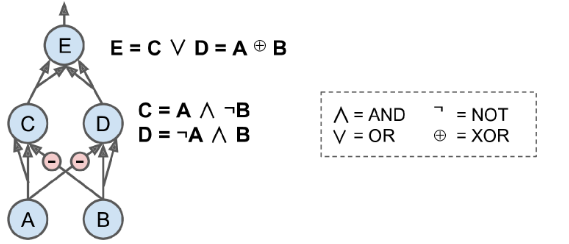

3. Why is it generally preferable to use a logistic regression classifier rather than a classic perceptron (i.e., a single layer of threshold logic units trained using the perceptron training algorithm)? How can you tweak a perceptron to make it equivalent to a logistic regression classifier?

Para que el perceptrón funcione se necesita que los datos sean linealmente separables, además el perceptrón no estima las probabilidades de las clases. Usando una función de activación sigmoide o softmax, usando el descenso de gradiente, el perceptrón se vuelve equivalente a una regresión logística.

4. Why was the sigmoid activation function a key ingredient in training the first MLPs?

Es una parte importante ya que su derivada siempre es diferente a cero, de esa forma el descenso de gradiente siempre puede bajar por la pendiente.

5. Name three popular activation functions. Can you draw them?

La función step heaviside, la función sigmoide, la función tangente hiperbólica, la ReLU

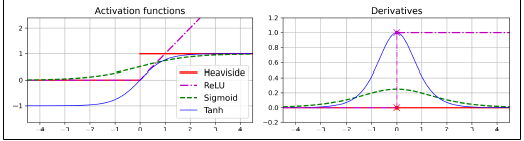

6. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

    - What is the shape of the input matrix X?
    
    La forma de la matriz de entrada X es m x 10, donde m representa el tamaño del lote de entrenamiento.
    
    - What are the shapes of the hidden layer’s weight matrix $W_h$ and bias vector $b_h$?
    
    La forma de matriz de pesos de las capas ocultas $W_h$ es 10 x 50, el tamaño de la matriz de sesgo $b_h$ es 50.
    
    - What are the shapes of the output layer’s weight matrix $W_o$ and bias vector $b_o$?
    
    La forma de la matriz de pesos de la capa de salida es 50 x 3, la del vector de sesgo es 3.
    
    - What is the shape of the network’s output matrix Y?
    
    La forma de la matriz de salida Y es m x 3
    
    - Write the equation that computes the network’s output matrix Y as a function of X, $W_h$, $b_h$, $W_o$, and $b_o$.
    
    $Y = ReLU(ReLU(XW_h + b_h)W_o + b_o)$.
    
    La función ReLU solo hace cada numero negativo en la matriz a cero. Cuando se añade un vector de sesgo a una matriz, añade cada fila a la matriz, eso se llama **broadcasting**
    

7. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about for getting your network to predict housing prices, as in Chapter 2?

Si se quiere clasificar un email en spam o ham, sólo se necesita una neurona de salida. Se debería usar una función sigmoide. Si se quiere clasificar el conjunto de datos MNIST necesitamos tantas neuronas de salida como categorias haya, se debería usar la función softmax. Para la regresión de los precios de las casas solo se necesita una neurona de salida, en este caso se puede dejar sin función de activación.

8. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?

**Backpropagation** es una técnica usada para entrenar redes neuronales, primero computa el gradiente de las funciones de costo de cada parámetro del modelo (pesos y sesgos), luego hace descenso de gradiente usando estos gradientes. Esto se hace muchas veces hasta que se llega un minimo de la función de costo. Para calcular los gradientes, se usa **reverse-mode autodiff**, este hace una pasada hacia el frente computando los valores de cada nodo para el lote de entrenamiento actual, luego hace una pasada al revés, calculando los gradientes. **reverse-mode autodiff** es la herramienta con la que se calculan los gradientes, **Backpropagation** es el proceso completo de entreno de la red neuronal.

9. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

    - El numero de capas ocultas.
    - El numero de neuronas en cada capa.
    - La función de activación en cada capa oculta y la de salida.

La función ReLU es una buena función por defecto para las capas ocultas. Para clasificación se usa sigmoide o la softmax, si es regresión no se usa función de activación en la salida.

Si el modelo sobreajusta los datos de entrenamiento, se puede reducir el número de capas ocultas y reduciendo las neuronas por capa oculta.

10. Train a deep MLP on the MNIST dataset (you can load it using tf.keras. datasets.mnist.load_data()). See if you can get over 98% accuracy by manually tuning the hyperparameters. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Next, try tuning the hyperparameters using Keras Tuner with all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
# 60_000 imagenes que contienen 28 x 28 pixeles

X_train_full.shape

(60000, 28, 28)

In [10]:
# cada pixel representado como un byte (0 a 255)
X_train_full.dtype

dtype('uint8')

In [11]:
# dividir los conjuntos de datos, transformar de 0 a 1
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

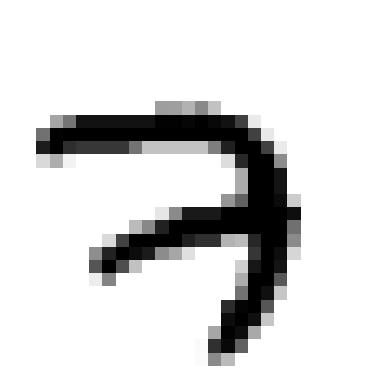

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [15]:
# los labels son enteros de 0 a 9
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [16]:
X_valid.shape

(5000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

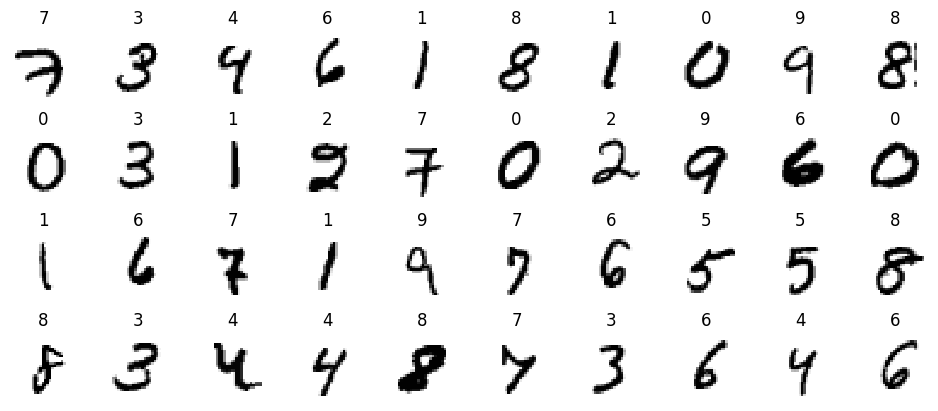

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [44]:
# construir una red densa y encontrar la tasa de aprendizaje optima. 
# Usamos el callback en cada iteración para aumentar la tasa de aprendizaje
# guardará la tasa y la perdida en cada iteración

K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [45]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [47]:
# se empieza con una tasa de aprendizaje de 1e-3 y se aumenta por 0.5% en cada iteración

optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-3)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizer,
             metrics = ['accuracy'])
expon_lr = ExponentialLearningRate(factor = 1.005)

In [48]:
# entrenemos el modelo por una epoca

history = model.fit(X_train, y_train, epochs = 1,
                   validation_data = (X_valid, y_valid),
                   callbacks = [expon_lr])

1719/1719 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5889 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

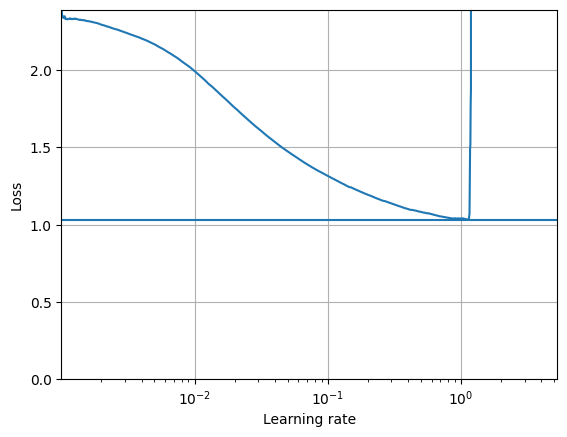

In [49]:
# graficamos la perdida en función de la tasa de aprendizaje

plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [50]:
# la perdida se dispara cuando la tasa de aprendizaje para de 6e-1, usemos 3e-1

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = Path() / "mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('mnist_logs/run_001')

In [51]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - ETA: 0s - loss: 0.2314 - accuracy: 0.9277INFO:tensorflow:Assets written to: mnist_model\assets


INFO:tensorflow:Assets written to: mnist_model\assets


1719/1719 [==============================] - 4s 2ms/step - loss: 0.2314 - accuracy: 0.9277 - val_loss: 0.0976 - val_accuracy: 0.9692
Epoch 2/100
1719/1719 [==============================] - ETA: 0s - loss: 0.0941 - accuracy: 0.9705INFO:tensorflow:Assets written to: mnist_model\assets


INFO:tensorflow:Assets written to: mnist_model\assets


1719/1719 [==============================] - 3s 2ms/step - loss: 0.0941 - accuracy: 0.9705 - val_loss: 0.0899 - val_accuracy: 0.9756
Epoch 3/100
1695/1719 [============================>.] - ETA: 0s - loss: 0.0650 - accuracy: 0.9790INFO:tensorflow:Assets written to: mnist_model\assets


INFO:tensorflow:Assets written to: mnist_model\assets


1719/1719 [==============================] - 3s 2ms/step - loss: 0.0654 - accuracy: 0.9789 - val_loss: 0.0773 - val_accuracy: 0.9764
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.0818 - val_accuracy: 0.9784
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9888 - val_loss: 0.1002 - val_accuracy: 0.9744
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0801 - val_accuracy: 0.9796
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.0881 - val_accuracy: 0.9818
Epoch 8/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.1012 - val_accuracy: 0.9776
Epoch 9/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0121 - accuracy: 0.9956 - val_loss: 0.0908 - val_accuracy: 0.98

In [52]:
model = tf.keras.models.load_model('mnist_model') # el mejor modelo
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 948us/step - loss: 0.0921 - accuracy: 0.9722


[0.09209135919809341, 0.9721999764442444]

In [55]:
%load_ext tensorboard
%tensorboard --logdir=./mnist_logs